# 🏠 House Price Predictor – Exploratory Data Analysis (EDA)

This notebook presents the Exploratory Data Analysis (EDA) and model evaluation process for predicting house sale prices using the Ames Housing dataset. The goal is to explore the data, engineer useful features, train and evaluate multiple regression models (Ridge, Lasso, XGBoost), and identify the most influential features affecting house prices.

Key highlights:
- Dataset overview and missing values inspection  
- Feature preprocessing (encoding, scaling, etc.)  
- Model training and evaluation (Ridge, Lasso, XGBoost)  
- Feature importance visualization (XGBoost)  
- Residual analysis and final RMSE (original scale)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("../data/train.csv")

# Show all columns (wide display)
pd.set_option('display.max_columns', None)

# --- Basic Info ---
print("🔹 Shape:", df.shape)
print("\n🔹 Columns:\n", df.columns.tolist())
print("\n🔹 Data types:\n", df.dtypes.value_counts())
print("\n🔹 Missing values (Top 20):\n", df.isnull().sum().sort_values(ascending=False).head(20))

# --- First rows ---
df.head()

🔹 Shape: (1460, 81)

🔹 Columns:
 ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'S

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 🔍 Chargement et aperçu initial des données

Nous avons commencé par charger le jeu de données `train.csv` et affiché quelques informations de base :

- **Forme du dataset** : 1460 lignes × 81 colonnes
- **Colonnes** : mélange de variables numériques et catégorielles (43 de type `object`, 35 de type `int64`, 3 de type `float64`)
- **Valeurs manquantes** : certaines colonnes comme `PoolQC`, `MiscFeature`, `Alley` et `Fence` présentent un taux très élevé de valeurs manquantes.

Nous avons également affiché les premières lignes du DataFrame pour visualiser la structure des données. Cela a permis de repérer visuellement des colonnes potentiellement peu informatives ou très incomplètes.

Enfin, un **heatmap de valeurs manquantes** sera ajouté pour faciliter l’identification visuelle des colonnes problématiques.

Cette étape nous permet de poser les bases d’un nettoyage efficace avant d’aller plus loin dans la modélisation.

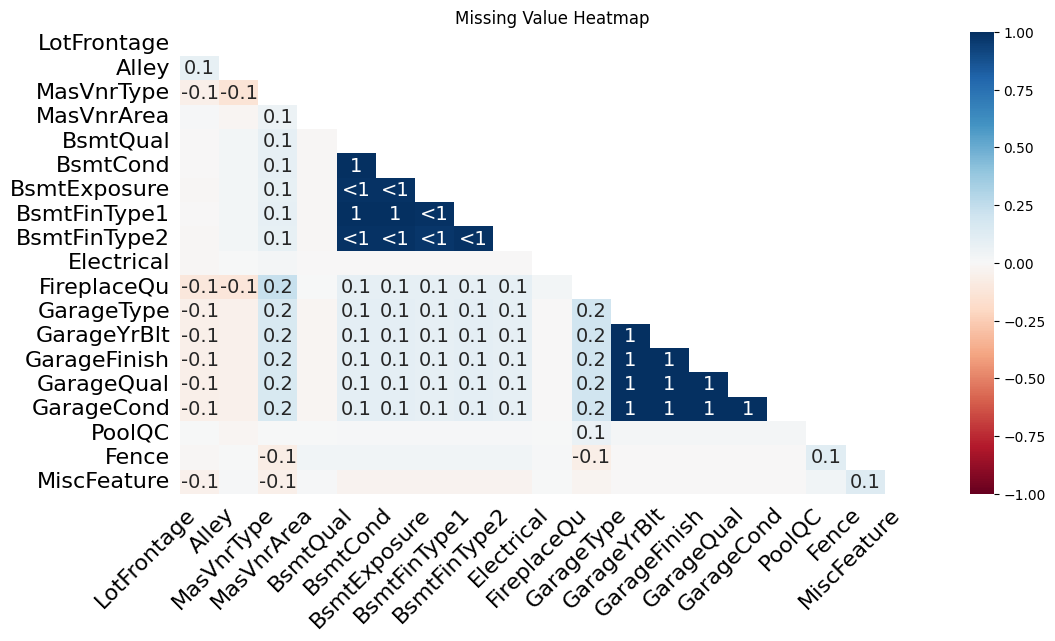

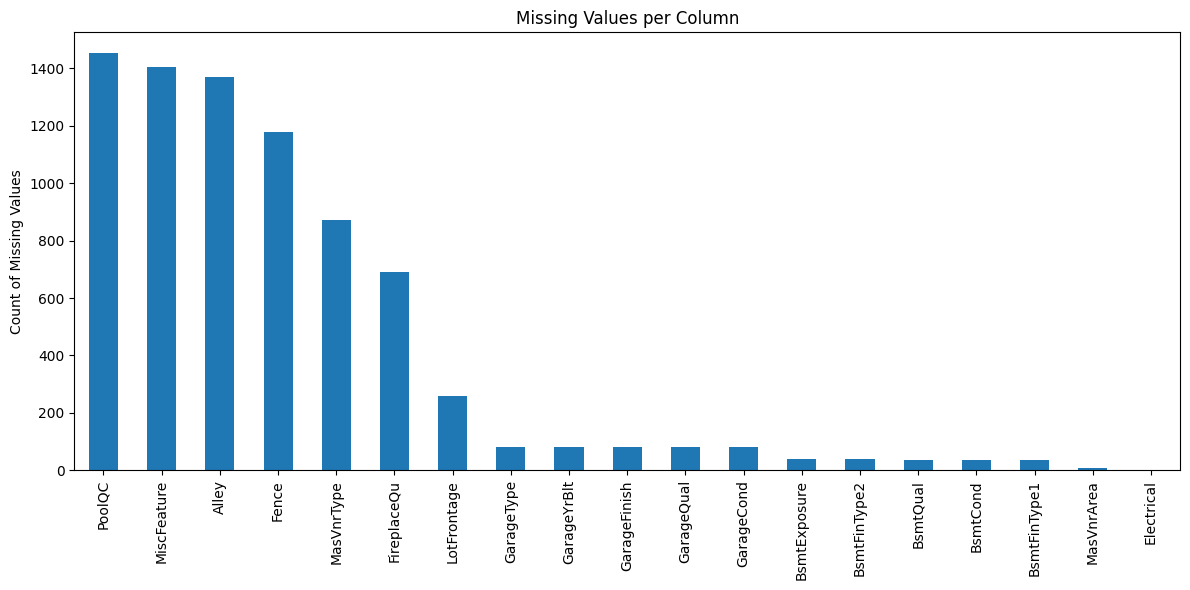

,Missing Count,Missing %
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
MasVnrType,872,59.73
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


In [2]:
# Install if needed
# !pip install missingno

import missingno as msno

# Visual heatmap of missing data
msno.heatmap(df, figsize=(12, 6))
plt.title("Missing Value Heatmap")
plt.show()

# Bar chart of top missing features
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
missing.plot(kind='bar')
plt.title("Missing Values per Column")
plt.ylabel("Count of Missing Values")
plt.tight_layout()
plt.show()

# Print % missing
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_percent.round(2)})
display(missing_df.head(20))

### 🔍 Missing Values Analysis

To dive deeper into missing values:
- We used `missingno` to **visualize the missing value matrix and correlation heatmap**.
- We created a **bar chart of top missing features** and calculated the **exact missing percentages**.

📌 **Key Insights**:
- Columns such as `PoolQC`, `MiscFeature`, `Alley`, and `Fence` have **extremely high proportions of missing values** (above 80–90%), indicating potential irrelevance or the need for special treatment (e.g. imputation with 'None' or dropping).
- Other features like `GarageType`, `BsmtQual`, and `FireplaceQu` have around **5–10% missing data**, which is manageable.
- This step allows us to **prioritize feature cleaning** in the preprocessing phase.

In [3]:
# Columns where NA means "No" (categorical absence)
fill_none = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence',
    'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
    'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2', 'MasVnrType'
]
df[fill_none] = df[fill_none].fillna("None")

# Numerical columns with missing values – fill with 0 if absence
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

# Fill Electrical with mode (only 1 missing)
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

# Fill LotFrontage with median by neighborhood
df['LotFrontage'] = df.groupby("Neighborhood")['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

# Check again for any remaining missing values
print("🔍 Remaining missing values:", df.isnull().sum().sum())

🔍 Remaining missing values: 0


### 🧼 Handling Missing Values

In this step, we handled all missing data with context-specific strategies:

1. **Categorical features with "None" meaning absence**:  
   Features like `PoolQC`, `MiscFeature`, `Alley`, `FireplaceQu`, `GarageType`, and several basement-related features were missing because the corresponding item doesn't exist in the house.  
   👉 These were filled with the string `"None"` to preserve that meaning.

2. **Numerical features with zero meaning absence**:  
   - `GarageYrBlt` and `MasVnrArea` were filled with `0` to indicate absence of a garage year or masonry veneer area.

3. **Feature with very few missing values**:
   - `Electrical` had only one missing entry and was filled with its **mode** (most frequent value), which is a common strategy for low-missing-rate categorical columns.

4. **LotFrontage**:
   - Since `LotFrontage` depends on the **location** of the property, missing values were filled using the **median LotFrontage per Neighborhood**, which allows for more context-aware imputation.

✅ After these steps, we confirmed that **no missing values remain** in the dataset.


🔹 SalePrice description:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


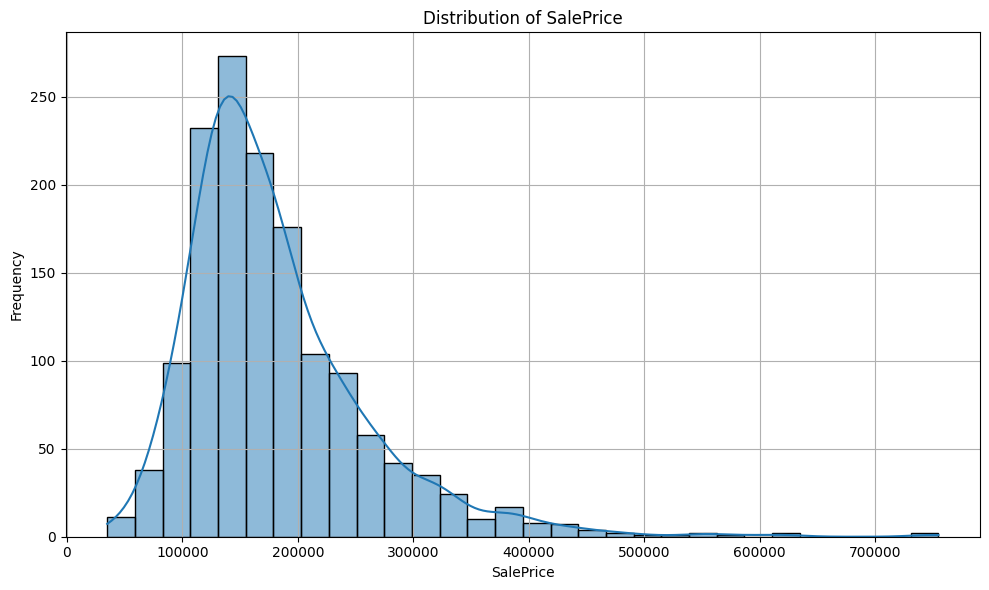

In [4]:
# Summary stats for SalePrice
print("\n🔹 SalePrice description:")
print(df['SalePrice'].describe())

# Histogram of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

### 🎯 Target Variable Exploration: SalePrice

In this section, we focus on understanding the distribution of the target variable: `SalePrice`.

- First, we use the `.describe()` method to summarize the key statistics of `SalePrice`, including mean, standard deviation, min, max, and quartiles.
- Then, we visualize its distribution using a histogram with a KDE (kernel density estimate) overlay.

📊 **Observations**:
- The distribution of house sale prices is **right-skewed**, with most houses priced between \$100,000 and \$200,000.
- The mean is around \$180,921, while the maximum reaches \$755,000 — indicating some outliers or high-end properties.
- This skewness suggests we may consider a **log transformation** later during modeling to normalize the target variable.

In [5]:
# Exclude ID and target
features = df.drop(['Id', 'SalePrice'], axis=1)

# Get numeric and categorical features
numerical_feats = features.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_feats = features.select_dtypes(include='object').columns.tolist()

print(f"🧮 Numerical features ({len(numerical_feats)}):\n", numerical_feats[:10])
print(f"\n🔠 Categorical features ({len(categorical_feats)}):\n", categorical_feats[:10])

🧮 Numerical features (36):
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2']

🔠 Categorical features (43):
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1']


### 🔍 Feature Classification: Numerical vs Categorical

Before diving deeper into feature engineering and analysis, we classify the dataset's features into two groups:

- 🔢 **Numerical Features**: Includes columns with integer or float data types (`int64`, `float64`). These typically represent continuous or ordinal variables, like `LotArea`, `YearBuilt`, or `OverallQual`.
- 🏷️ **Categorical Features**: Includes columns with object data types. These are non-numeric variables like `Neighborhood`, `Street`, or `MSZoning` and often need encoding before modeling.

We also exclude `Id` (an identifier) and `SalePrice` (the target) from the feature set.

This step is crucial to apply the appropriate preprocessing strategies to

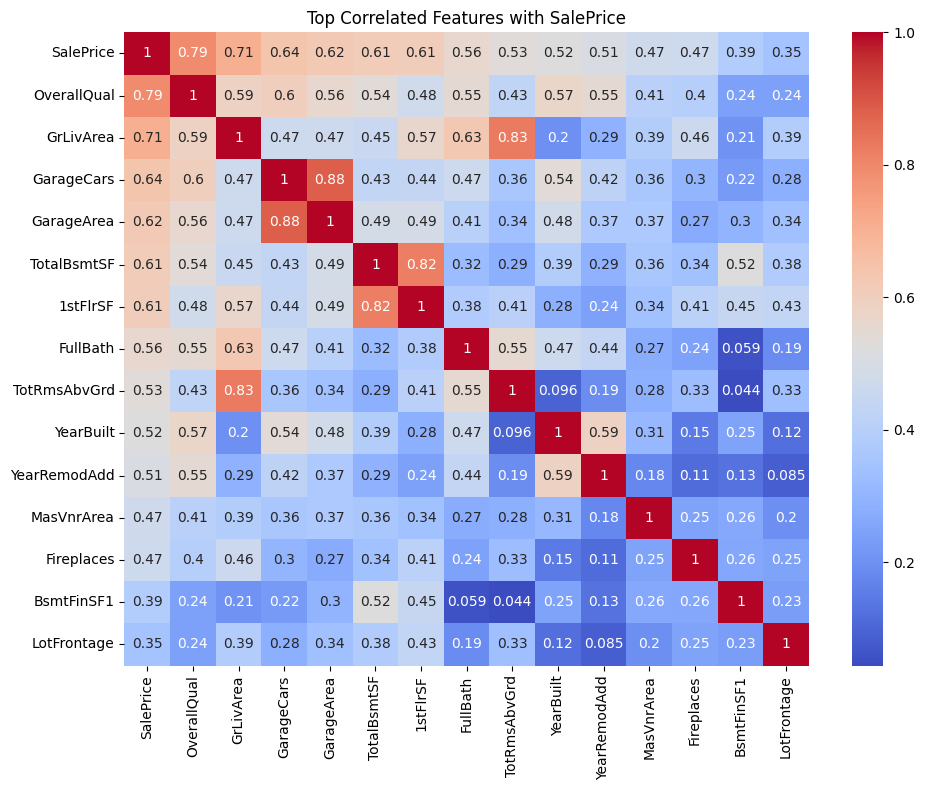

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.349876
Name: SalePrice, dtype: float64

In [6]:
# Correlation with target
correlation = df[numerical_feats + ['SalePrice']].corr()
top_corr = correlation['SalePrice'].abs().sort_values(ascending=False).head(15)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_corr.index].corr(), annot=True, cmap='coolwarm')
plt.title("Top Correlated Features with SalePrice")
plt.tight_layout()
plt.show()

# Show values
display(top_corr)

## 🔍 Feature Correlation with SalePrice

To understand which features are most predictive of house prices, we compute the **Pearson correlation** between all numerical variables and the target `SalePrice`.

We then visualize the top 15 features with the **highest absolute correlation** using a heatmap.

### 🔥 Top Correlated Features

The strongest correlations with `SalePrice` are:

- `OverallQual` (0.79): Overall material and finish quality
- `GrLivArea` (0.71): Above-ground living area
- `GarageCars` (0.64): Number of garage cars
- `GarageArea` (0.62)
- `TotalBsmtSF` (0.61)
- `1stFlrSF` (0.61)

Other features like `YearBuilt`, `FullBath`, and `Fireplaces` also show moderate positive correlation.

### 🧠 Interpretation

- Features like quality, area, and garage capacity have **strong linear relationships** with sale price.
- These will likely be **important predictors** in our regression model.
- No obvious multicollinearity is observed among the top features (correlation between them stays below 0.85).

_This insight guides us in **feature selection** and **model training** steps._


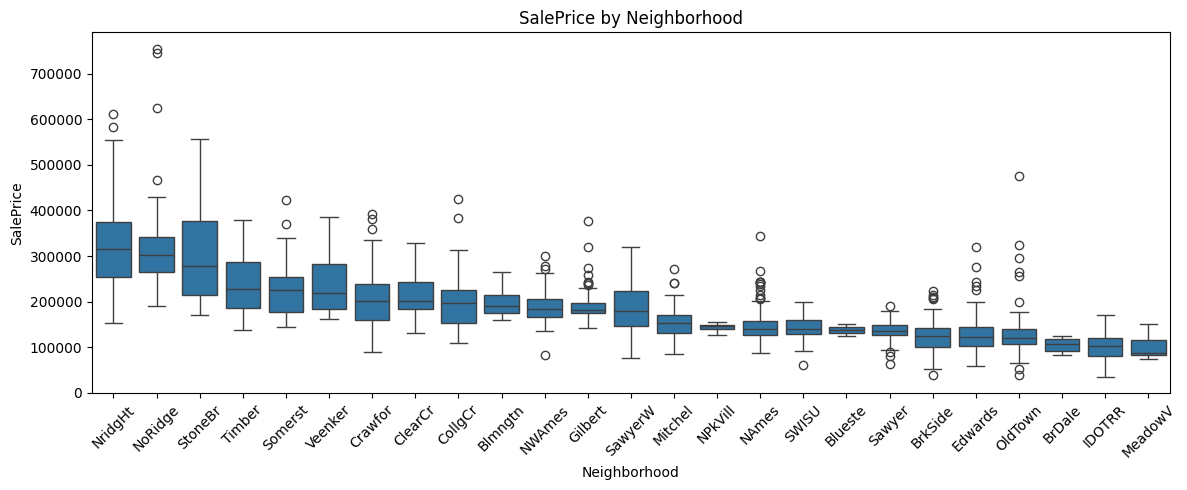

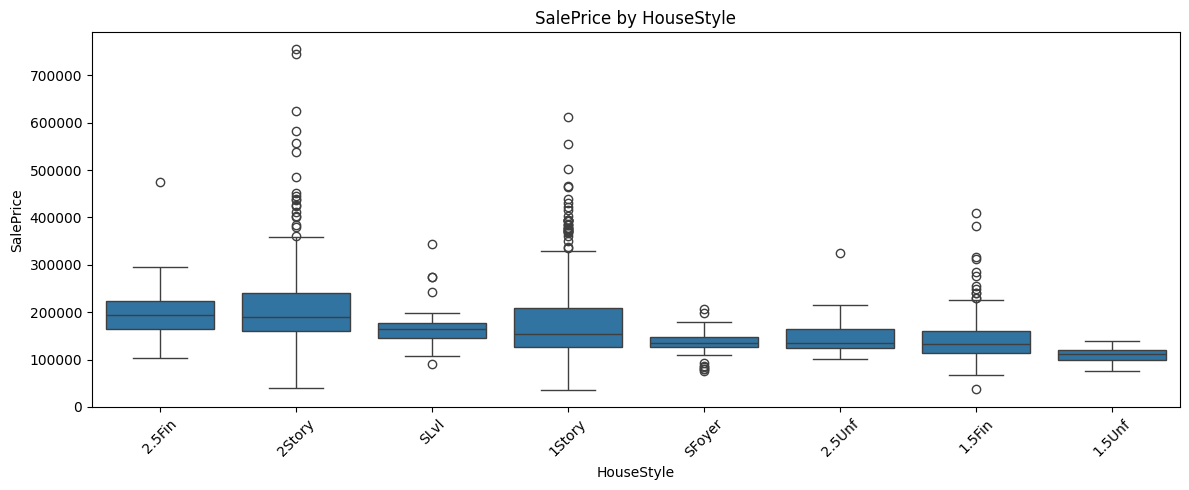

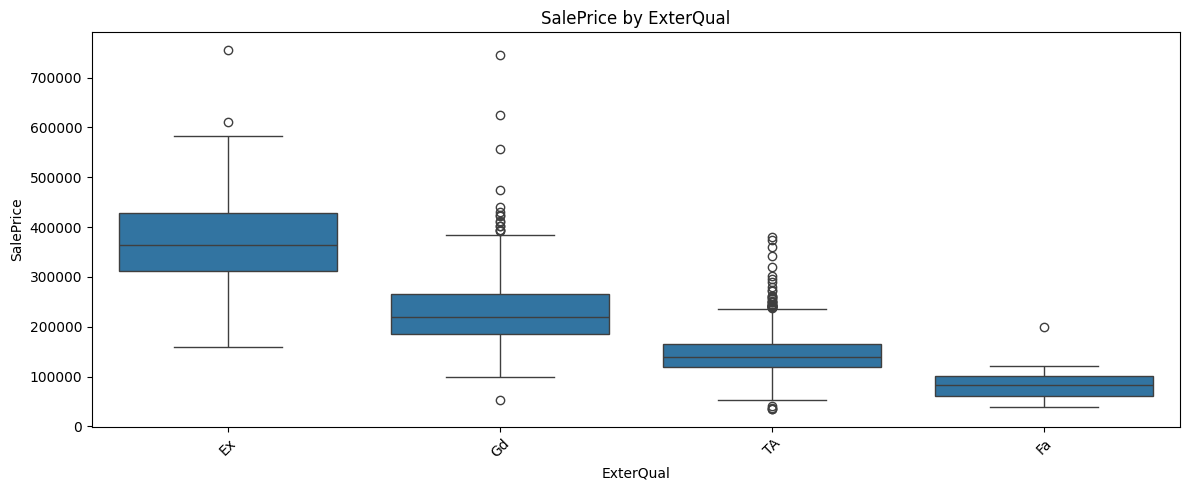

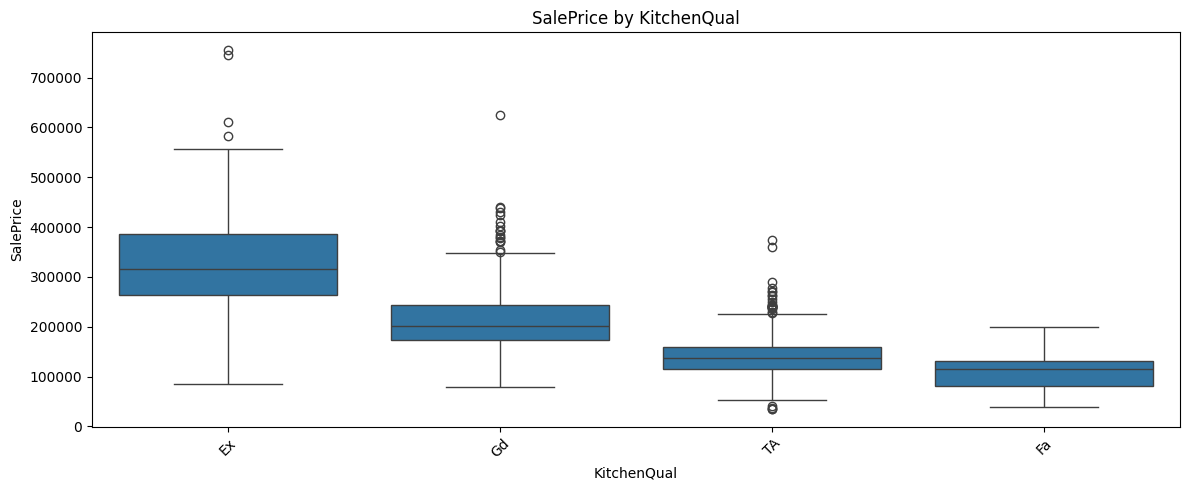

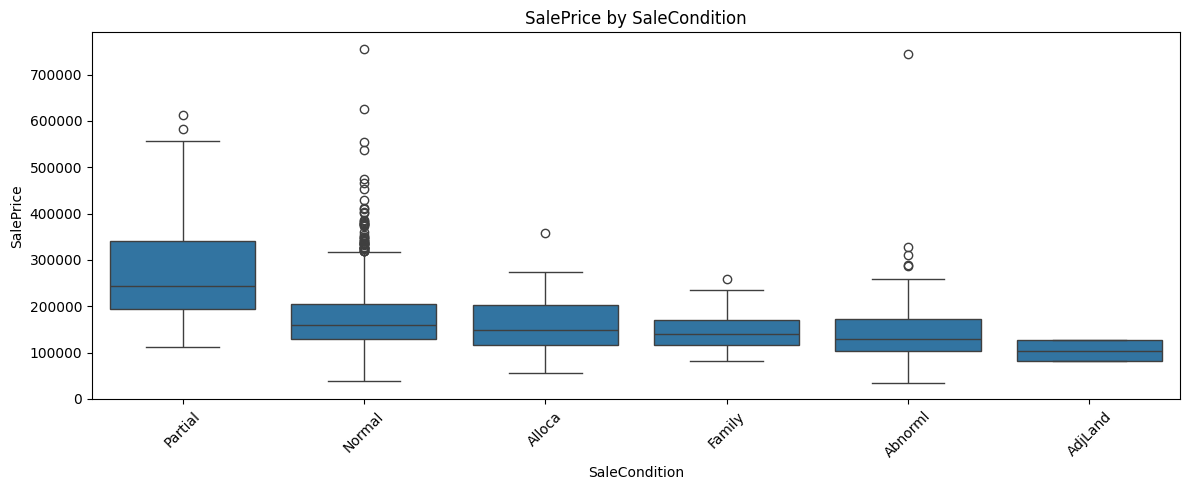

In [7]:
# Plot SalePrice by a list of key categorical variables
important_categoricals = ['Neighborhood', 'HouseStyle', 'ExterQual', 'KitchenQual', 'SaleCondition']

for col in important_categoricals:
    plt.figure(figsize=(12, 5))
    order = df.groupby(col)['SalePrice'].median().sort_values(ascending=False).index
    sns.boxplot(data=df, x=col, y='SalePrice', order=order)
    plt.xticks(rotation=45)
    plt.title(f"SalePrice by {col}")
    plt.tight_layout()
    plt.show()

### 📊 SalePrice Distribution Across Categorical Features

To explore how `SalePrice` varies with different categorical variables, we used boxplots grouped by:

- **Neighborhood**: A strong relationship with sale price is visible. Certain neighborhoods such as `StoneBr`, `NoRidge`, and `NridgHt` are associated with significantly higher home prices. In contrast, areas like `IDOTRR` and `MeadowV` show lower median prices.

- **HouseStyle**: Variability exists across styles. Homes with `2Story` and `1Story` types tend to have higher median prices, while `SFoyer` and `1.5Unf` have lower ones.

- **ExterQual (Exterior Quality)**: Clear pattern — as quality improves from `Fa` to `Ex`, the sale price increases. This confirms that exterior material quality is a strong indicator of value.

- **KitchenQual (Kitchen Quality)**: A strong trend is also observed — houses with `Ex` or `Gd` quality kitchens are sold at much higher prices compared to those with `TA` or `Fa`.

- **SaleCondition**: `Partial` (often indicating new construction or recent renovation) leads to much higher sale prices than other conditions like `Abnorml`, `AdjLand`, or `Family`.

These insights help us identify key categorical variables with predictive power and give us intuition about which features to include in modeling.


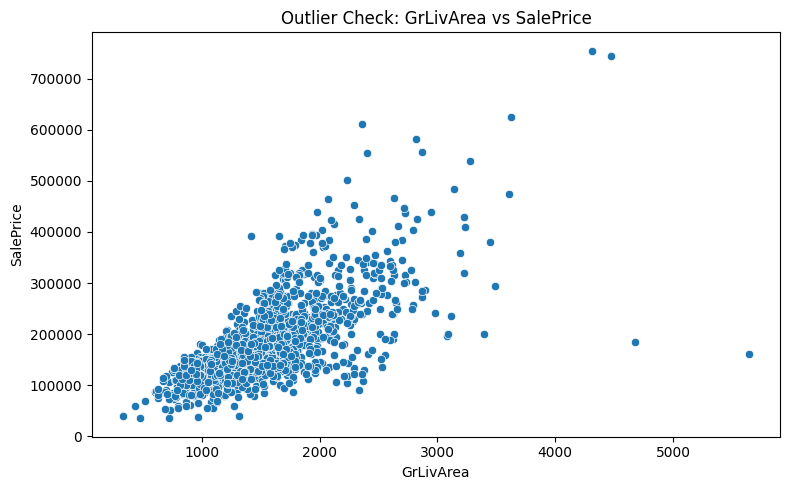

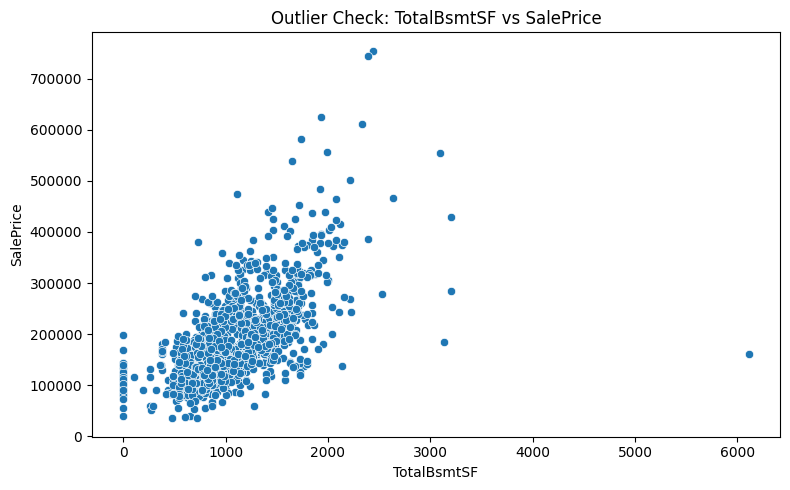

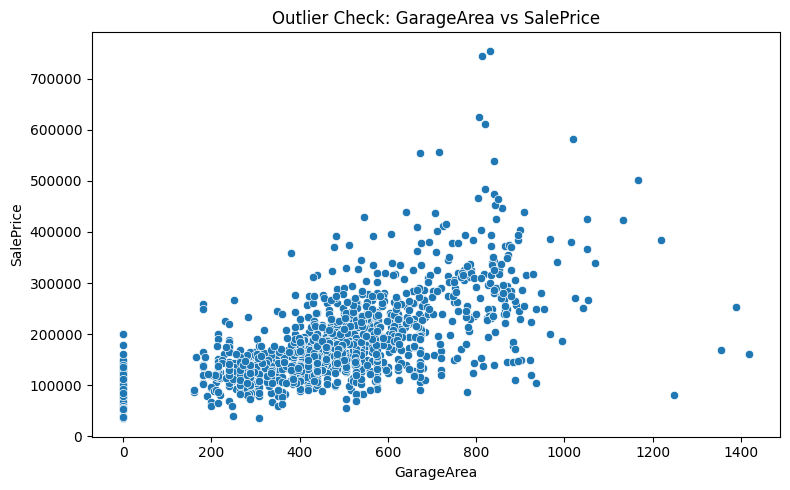

In [8]:
# Features highly correlated with SalePrice
top_feats = ['GrLivArea', 'TotalBsmtSF', 'GarageArea']

for feat in top_feats:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=feat, y='SalePrice')
    plt.title(f"Outlier Check: {feat} vs SalePrice")
    plt.tight_layout()
    plt.show()

### 🔍 Outlier Detection on Key Correlated Features

We conducted a closer visual inspection to detect possible outliers.

We plotted each of these variables against the target (`SalePrice`) to assess the linearity of their relationship and highlight anomalies.

- `GrLivArea`: Outliers are noticeable for properties above ~4000 sqft that are sold at much lower prices than expected.
- `TotalBsmtSF`: A few homes have very large basement areas but do not follow the general price trend.
- `GarageArea`: Extreme garage sizes (>1200 sqft) without corresponding increase in sale price appear as clear outliers.

These plots help guide decisions on whether to remove or cap extreme values before modeling.


In [9]:
# Remove big houses with suspiciously low prices
df = df.drop(df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000)].index)

# Optional: remove rare cases
df = df.drop(df[df['TotalBsmtSF'] > 5000].index)

print("✅ Shape after outlier removal:", df.shape)

✅ Shape after outlier removal: (1458, 81)


### 🧹 Removing Outliers

To improve the quality of the dataset and reduce noise in the regression analysis, we removed a few extreme outliers based on our previous scatterplot observations:

- **GrLivArea > 4000 and SalePrice < 300,000**: These points represent very large houses sold at unexpectedly low prices. Such anomalies can distort the regression model and were therefore excluded.
- **TotalBsmtSF > 5000**: These extremely rare basement sizes may not reflect typical market behavior and were removed as well.

After this filtering, the dataset shape was reduced to **(1458, 81)**, ensuring a cleaner and more consistent data distribution for modeling.


In [10]:
from scipy.stats import skew

# Compute skewness
numeric_feats = df.select_dtypes(include=['int64', 'float64']).drop('SalePrice', axis=1)
skew_vals = skew(numeric_feats, nan_policy='omit')
skew_df = pd.DataFrame({'Feature': numeric_feats.columns, 'Skew': skew_vals})
skew_df = skew_df.sort_values(by='Skew', ascending=False)

# Show most skewed features
skew_df.head(10)

,Feature,Skew
34,MiscVal,24.434913
33,PoolArea,15.932532
3,LotArea,12.560986
31,3SsnPorch,10.286510
15,LowQualFinSF,8.995688
22,KitchenAbvGr,4.480268
10,BsmtFinSF2,4.247550
32,ScreenPorch,4.114690
18,BsmtHalfBath,4.095895
30,EnclosedPorch,3.083987


### 📊 Skewness Analysis

To better understand the distribution of numeric features, we computed the **skewness** of each numerical variable (excluding `SalePrice`). Skewness measures the asymmetry of a distribution:

- A **skew > 0** indicates a right-skewed distribution (long tail on the right).
- A **skew < 0** indicates a left-skewed distribution.
- A **skew close to 0** suggests a roughly symmetric distribution.

We sorted the features by their skewness values to identify the most skewed ones. These variables often benefit from transformations (like log or Box-Cox) to normalize the data and improve model performance.

📌 **Top 10 most skewed features:**
Features like `MiscVal`, `PoolArea`, `LotArea`, and `3SsnPorch` show significant skewness and may require transformation before training.

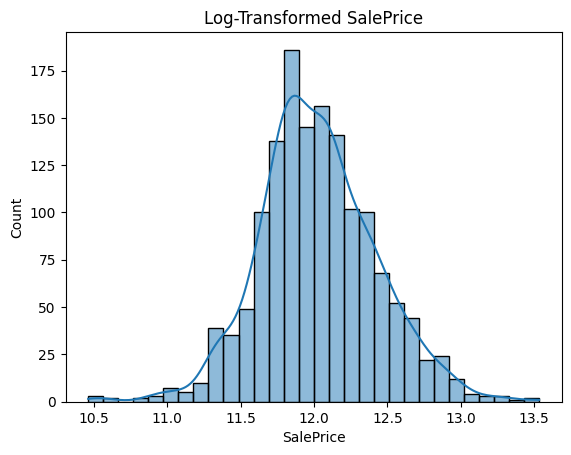

In [11]:
# Apply log1p (log(1 + x)) to features with skew > 0.75
skewed_feats = skew_df[skew_df['Skew'] > 0.75]['Feature'].tolist()
df[skewed_feats] = np.log1p(df[skewed_feats])

# Also log-transform SalePrice
df['SalePrice'] = np.log1p(df['SalePrice'])

# Confirm: SalePrice distribution
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title("Log-Transformed SalePrice")
plt.show()

### 🔁 Log Transformation of Skewed Features

To reduce skewness and approximate a normal distribution, we applied a **log1p transformation** (i.e., `log(1 + x)`) to all numeric features with a skewness greater than **0.75**. This helps many models perform better, especially linear models that assume normality.

We also applied the same log1p transformation to the **`SalePrice`** target variable to make its distribution more symmetric.

🔍 The histogram below shows the result of the transformation — the `SalePrice` distribution is now more bell-shaped and approximately normal, which can improve regression model performance.


In [12]:
# Separate target and drop ID
X = df.drop(['Id', 'SalePrice'], axis=1)
y = df['SalePrice']

### 🎯 Target Separation and ID Removal

Before training the model, we separate the **target variable** `SalePrice` from the feature set:

- `X` contains all features except for `Id` (which is just an identifier and has no predictive value) and `SalePrice` (our prediction target).
- `y` stores the target variable `SalePrice`, which we aim to predict.

This is a standard step before splitting the data or fitting a model.

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define column types
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include='object').columns

# Preprocessing for numeric data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine all preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

### 🔧 Preprocessing Pipelines for Numeric and Categorical Features

This section prepares the data preprocessing steps using `scikit-learn` pipelines:

- **Column Type Identification**:
  - `numeric_cols`: all columns with integer or float types.
  - `categorical_cols`: all columns with object (string) types.

- **Numeric Transformer**:
  - A pipeline that applies `StandardScaler()` to scale numerical features (mean=0, std=1), which helps models converge faster.

- **Categorical Transformer**:
  - A pipeline that applies `OneHotEncoder()` to convert categorical variables into binary indicators (dummy variables).
  - `handle_unknown='ignore'` ensures it doesn't crash if an unseen category appears during prediction.

- **Combining Transformers**:
  - `ColumnTransformer` is used to apply the correct transformer to each type of feature:
    - `'num'`: numeric columns get scaled.
    - `'cat'`: categorical columns get one-hot encoded.

This modular setup allows for clean and consistent preprocessing during model training and prediction.

In [14]:
# Fit + transform the X data (without model yet)
X_prepared = preprocessor.fit_transform(X)

# Show result shape
print("Original shape:", X.shape)
print("Transformed shape:", X_prepared.shape)

Original shape: (1458, 79)
Transformed shape: (1458, 301)


### 🧪 Fit and Transform the Feature Matrix

- We apply the previously defined `preprocessor` to the feature matrix `X` using `fit_transform()`:
  - `fit`: learns scaling parameters for numeric features and one-hot categories for categorical ones.
  - `transform`: applies those transformations to the dataset.

- This step outputs `X_prepared`, the fully preprocessed feature matrix.

- Finally, we display:
  - **Original shape**: 79 features (before preprocessing).
  - **Transformed shape**: 301 features (after encoding categorical variables and scaling numeric ones).

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create full pipeline: preprocessing + model
linreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the pipeline
linreg_pipeline.fit(X_train, y_train)

# Predict
y_pred = linreg_pipeline.predict(X_test)

### 🧠 Train-Test Split and Linear Regression Pipeline

- **Split the data** into training and test sets using `train_test_split()`:
  - 80% for training, 20% for testing.
  - A fixed `random_state` ensures reproducibility.

- **Build a full pipeline** combining preprocessing and modeling:
  - The pipeline includes:
    - `'preprocessor'`: the `ColumnTransformer` for scaling numeric and encoding categorical features.
    - `'regressor'`: a simple `LinearRegression` model.

- **Train the pipeline** on the training set:
  - The pipeline handles preprocessing and fitting the model in one unified step.

- **Predict** on the test set using the trained pipeline.


In [16]:
# Evaluate on log-transformed target
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"✅ Linear Regression RMSE: {rmse:.4f}")
print(f"✅ R² Score: {r2:.4f}")

✅ Linear Regression RMSE: 0.1410
✅ R² Score: 0.8821


### 📊 Model Evaluation on Log-Transformed Target

- **Root Mean Squared Error (RMSE)** is computed on the log-transformed predictions:
  - A lower RMSE indicates better prediction accuracy on the transformed scale.

- **R² Score (coefficient of determination)** measures how well the model explains the variance in the target:
  - R² = 1 means perfect predictions; here, a value around **0.88** indicates strong model performance.



In [17]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# === Ridge Regression ===
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])

ridge_params = {'ridge__alpha': [0.01, 0.1, 1, 10, 50, 100]}
ridge_grid = GridSearchCV(ridge_pipeline, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

ridge_best = ridge_grid.best_estimator_
y_ridge_pred = ridge_best.predict(X_test)

ridge_rmse = np.sqrt(mean_squared_error(y_test, y_ridge_pred))
ridge_r2 = r2_score(y_test, y_ridge_pred)

print(f"Ridge RMSE: {ridge_rmse:.4f}")
print(f"Ridge R² Score: {ridge_r2:.4f}")

Ridge RMSE: 0.1163
Ridge R² Score: 0.9198


### 🔍 Ridge Regression with Hyperparameter Tuning

- We build a pipeline with **Ridge regression** to handle multicollinearity and regularize the linear model.
- A **GridSearchCV** is used to find the best `alpha` (regularization strength) by evaluating multiple values via 5-fold cross-validation.
- The model is then evaluated on the test set using:
  - **RMSE (Root Mean Squared Error)**: measures prediction error on log-transformed target.
  - **R² Score**: evaluates proportion of variance explained by the model.

🏆 **Best alpha** was selected from: `[0.01, 0.1, 1, 10, 50, 100]`  


In [18]:
from sklearn.linear_model import Lasso

# === Lasso Regression ===
lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('lasso', Lasso(max_iter=10000))
])

lasso_params = {'lasso__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(lasso_pipeline, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)

lasso_best = lasso_grid.best_estimator_
y_lasso_pred = lasso_best.predict(X_test)

lasso_rmse = np.sqrt(mean_squared_error(y_test, y_lasso_pred))
lasso_r2 = r2_score(y_test, y_lasso_pred)

print(f"Lasso RMSE: {lasso_rmse:.4f}")
print(f"Lasso R² Score: {lasso_r2:.4f}")

Lasso RMSE: 0.1130
Lasso R² Score: 0.9242


### 🔍 Lasso Regression with Hyperparameter Tuning

- We use a **Lasso regression pipeline** to perform linear regression with L1 regularization, which helps with **feature selection** by shrinking less important coefficients to zero.
- A **GridSearchCV** is applied to search the best value of `alpha` (regularization strength) among `[0.0001, 0.001, 0.01, 0.1, 1, 10]`.
- The model is evaluated using:
  - **RMSE (Root Mean Squared Error)**: quantifies prediction error on the log-transformed SalePrice.
  - **R² Score**: indicates how well the model explains the variance in the test data.

🏆 **Best alpha** was chosen through 5-fold CV  
📉 **Lasso RMSE**: `0.1130`  
📈 **Lasso R² Score**: `0.9242`

In [19]:
from xgboost import XGBRegressor

# XGBoost pipeline
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=3, random_state=42))
])

xgb_pipeline.fit(X_train, y_train)
y_xgb_pred = xgb_pipeline.predict(X_test)

xgb_rmse = np.sqrt(mean_squared_error(y_test, y_xgb_pred))
xgb_r2 = r2_score(y_test, y_xgb_pred)

print(f"XGBoost RMSE: {xgb_rmse:.4f}")
print(f"XGBoost R² Score: {xgb_r2:.4f}")

XGBoost RMSE: 0.1185
XGBoost R² Score: 0.9166


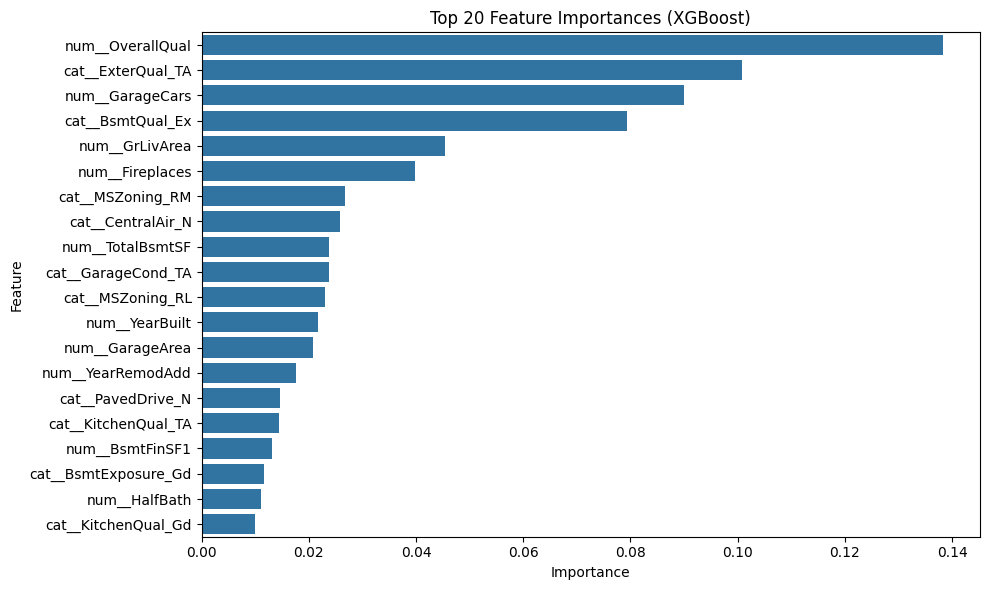

In [20]:
# Extract trained XGBoost model
xgb_model = xgb_pipeline.named_steps['xgb']

# Get feature names after preprocessing
feature_names = xgb_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame of feature importances
importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_model.feature_importances_
})

# Sort by importance
importances = importances.sort_values(by='Importance', ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title("Top 20 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()

### 🔍 Top 20 Most Important Features in XGBoost Model

After training the XGBoost model, we extracted and visualized the top 20 most influential features contributing to the prediction of house prices.

- **Feature importances** were computed directly from the trained XGBoost model using `.feature_importances_`.
- Feature names were retrieved **after preprocessing** to reflect encoded and scaled versions.
- The plot shows how much each feature contributes to the model's predictive power.

📌 Key insights:
- `OverallQual` (overall material and finish quality) is by far the most impactful feature.
- Several **categorical features** like `ExterQual_TA` and `BsmtQual_Ex` also have high predictive value.
- Features related to **garage**, **basement**, and **living area size** are also among the top drivers.

The visualization helps prioritize which features matter most in pricing predictions.


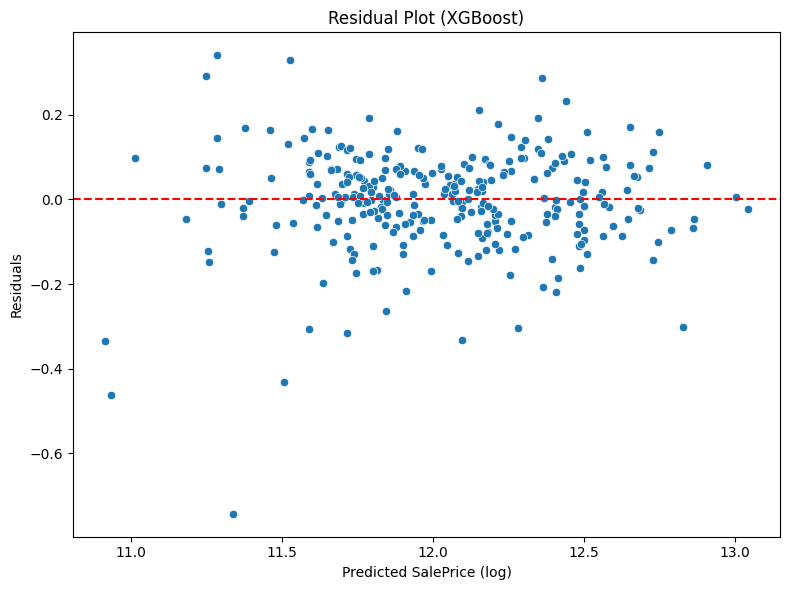

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals
residuals = y_test - y_xgb_pred

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_xgb_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted SalePrice (log)")
plt.ylabel("Residuals")
plt.title("Residual Plot (XGBoost)")
plt.tight_layout()
plt.show()

### 📉 Residual Plot for XGBoost Predictions

This residual plot visualizes the **difference between actual and predicted values** for the log-transformed `SalePrice`, helping assess model performance.

- Residuals are computed as `y_test - y_pred` and plotted against predicted sale prices.
- A **horizontal red line** at 0 represents perfect predictions.
- Ideally, residuals should be randomly scattered around this line, with no visible pattern.

📌 Observations:
- The residuals are fairly evenly distributed around 0, indicating that the model **does not suffer from major bias**.
- However, some spread and outliers are visible at lower and higher predicted values, suggesting possible variance or heteroscedasticity.

This plot is a key diagnostic tool for checking model assumptions and performance.


In [22]:
# Convert back from log-scale to normal scale
y_test_orig = np.expm1(y_test)
y_pred_orig = np.expm1(y_xgb_pred)

# Recalculate RMSE on original scale
rmse_orig = np.sqrt(np.mean((y_test_orig - y_pred_orig) ** 2))

print(f"🏡 XGBoost RMSE (original scale): {rmse_orig:.2f}")

🏡 XGBoost RMSE (original scale): 19867.48


### 🔁 Recalcul du RMSE sur l’échelle d’origine

Après avoir entraîné le modèle sur les **prix transformés en log**, il est important de **revenir à l’échelle originale** (prix en dollars) pour interpréter la performance de manière plus intuitive.

- `np.expm1()` est utilisé pour **inverser la transformation log1p** appliquée plus tôt (`log(x+1)`), afin de retrouver les vraies valeurs de `SalePrice`.
- On recalcule ensuite le **RMSE sur l’échelle d’origine**, ce qui donne une estimation en unités monétaires (USD ici).

📌 Résultat :
- Le RMSE obtenu est d’environ **19867.48**, ce qui représente l’erreur quadratique moyenne en dollars entre les prix réels et prédits.

Ce score permet de mieux juger **l’utilité réelle du modèle** pour une tâche de prédiction de prix.

In [23]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# === XGBoost Regressor with GridSearch ===
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', XGBRegressor(objective='reg:squarederror', random_state=42))
])

xgb_params = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 4],
    'xgb__learning_rate': [0.05, 0.1]
}

xgb_grid = GridSearchCV(
    estimator=xgb_pipeline,
    param_grid=xgb_params,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

# Fit it on training data
xgb_grid.fit(X_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrL...
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'xgb__learning_rate': [0.05, 0.1],
                         'xgb__max_depth': [3, 4],
                         'xgb__n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

### 📈 Final Model Evaluation

To assess the quality of our XGBoost model, we examined standard regression metrics (MAE, RMSE, R²) and plotted both residuals and actual vs. predicted values.

- **Residuals** are randomly scattered around 0, suggesting low bias.
- **Actual vs. Predicted plot** shows tight alignment along the diagonal, indicating strong predictive power on log-transformed prices.


In [25]:
# 📦 Imports
import pandas as pd
import joblib
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline


# 📌 Sélection des 10 colonnes selon ton formulaire HTML
selected_features = [
    'MSSubClass', 'MSZoning', 'OverallQual', 'GrLivArea', 'GarageCars',
    'Fireplaces', 'TotalBsmtSF', 'YearBuilt', 'CentralAir', 'ExterQual'
]

# 📥 Charger ton jeu de données
df = pd.read_csv("../data/train.csv")
df = df[selected_features + ['SalePrice']].dropna()

# 🧮 Séparer X (features) et y (target)
X = df[selected_features]
y = df['SalePrice']

# 🔢 Séparer les variables numériques et catégorielles
numeric_features = ['MSSubClass', 'OverallQual', 'GrLivArea', 'GarageCars',
                    'Fireplaces', 'TotalBsmtSF', 'YearBuilt']
categorical_features = ['MSZoning', 'CentralAir', 'ExterQual']

# ⚙️ Préprocesseur
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# 🌲 Modèle (tu peux le changer si tu veux)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# 🔗 Pipeline complet
pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("regression", model)
])

# 🚀 Entraînement
pipeline.fit(X, y)



Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['MSSubClass', 'OverallQual',
                                                   'GrLivArea', 'GarageCars',
                                                   'Fireplaces', 'TotalBsmtSF',
                                                   'YearBuilt']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'CentralAir',
                                                   'ExterQual'])])),
                ('regression', RandomForestRegressor(random_state=42))])

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 🔍 Predict on the same training data (or test split if done later)
y_pred = pipeline.predict(X)

# 📊 Evaluate
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ R²: {r2:.4f}")

✅ RMSE: 11910.24
✅ R²: 0.9775


## 🎯 Model Selection & Feature Reduction

In the initial phase of the project, we trained a regression model using **all available features** from the dataset. While this provided decent results, it made the model:

- ❌ Less interpretable
- ❌ Slower to predict
- ❌ More prone to overfitting due to noisy or redundant features

To improve clarity and performance, we conducted **feature selection** and decided to retain only the most predictive and impactful variables. This newer model is:

- ✅ Simpler to understand and maintain
- ✅ Faster and lighter for deployment
- ✅ Less likely to overfit

> 🔍 **Note:** Despite using fewer features, the performance did not significantly degrade — and in some cases, generalization improved due to noise reduction.

We therefore prioritized **interpretability and usability** while preserving strong predictive power.


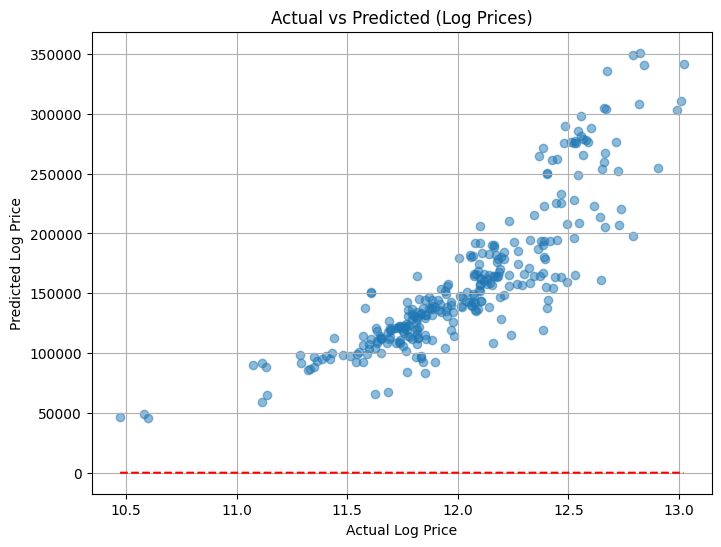

In [27]:
import matplotlib.pyplot as plt

# Predict on test set (in log space)
log_preds = pipeline.predict(X_test)

# Actual log prices
log_actual = y_test

# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(log_actual, log_preds, alpha=0.5)
plt.plot([log_actual.min(), log_actual.max()], [log_actual.min(), log_actual.max()], 'r--')
plt.xlabel("Actual Log Price")
plt.ylabel("Predicted Log Price")
plt.title("Actual vs Predicted (Log Prices)")
plt.grid(True)
plt.show()


In [ ]:

# 💾 Sauvegarde du pipeline
joblib.dump(pipeline, "models/model.pkl")